# Hough Transform Testing

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd

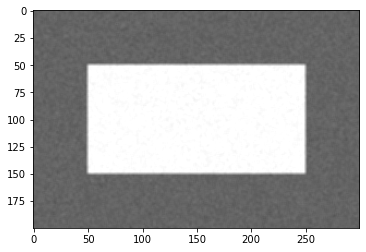

In [161]:
# Create image with lines
r = 200
c = 300
image = 100*np.ones([200,300])
image[50:-50,50:-50] = 255

# Add noise to the image
sigma = 10
mean = 0
noise = sigma*np.random.randn(r,c) + mean
image = image+noise
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Smooth the image
box = np.ones([3,3])/9
image = nd.convolve(image,box)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

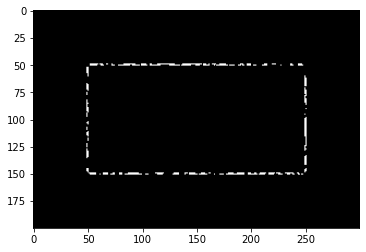

In [162]:
# Find the edges
sobelx = np.array([[1,0,-1],
                   [2,0,-2],
                   [1,0,-1]])

sobely = np.array([[ 1, 2, 1],
                   [ 0, 0, 0],
                   [-1,-2,-1]])

Ix = nd.convolve(image,sobelx)
Iy = nd.convolve(image,sobely)
mag = np.sqrt(Ix**2+Iy**2)

# Submax supression
threshold = 0.9
mag[mag <= threshold*np.amax(mag)] = 0
mag[mag>=255] = 255

plt.imshow(mag, cmap='gray')